In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel("C:/Users/z/Desktop/python_import/cc_dataset_messy.xlsx")
df

,date,ward,jméno pacienta,sex,age,microbe,crp,temp,btype,hb
0,2023-03-12,JIP_A,Petra Nová,f,31.0,Staphylococcus aureus,120,38.5,A+,119
1,2023-03-12,JIP A,Jana Modrá,f,81.0,Staphylococcus epidermidis,30,37.3,A-,120
2,2023-03-13,JIP_A,Jan Bezucký,m,7.0,Haemophilus influenzae,70,38.6,B+,142
3,2023-03-13,CHIR_B,Marie Vomáčková,f,47.0,Staphylococcus epidermidis,46,36.9,0,89
4,2023-03-13,CHIR_B,Marie Vomáčková,f,47.0,Staphylococcus epidermidis,46,36.9,0,89
5,2023-03-13,CHIR_B,Klára Doskočilová,f,18.0,Neisseria meningitidis,88,39.5,A+,109
6,2023-03-13,JIP A,Petr Červený,m,33.0,Neisseria meningitidis,91,38.9,A+,162
7,2023-03-13,JIP A,Petr Červený,m,33.0,Neisseria meningitidis,91,38.9,A+,162
8,2023-03-14,JIP_A,Miroslav Kovář,m,81.0,Streptococcus pneumoniae,132,37.3,B-,105
9,2023-03-17,CHIR_B,Jaroslav Šťastný,m,75.0,Staphylococcus epidermidis,78,38.4,A+,131


In [22]:
# problematicke nazvy sloupcu
ndf = df.rename(columns={"jméno pacienta":"patient"})
ndf.head()

,date,ward,patient,sex,age,microbe,crp,temp,btype,hb
0,2023-03-12,JIP_A,Petra Nová,f,31.0,Staphylococcus aureus,120,38.5,A+,119
1,2023-03-12,JIP A,Jana Modrá,f,81.0,Staphylococcus epidermidis,30,37.3,A-,120
2,2023-03-13,JIP_A,Jan Bezucký,m,7.0,Haemophilus influenzae,70,38.6,B+,142
3,2023-03-13,CHIR_B,Marie Vomáčková,f,47.0,Staphylococcus epidermidis,46,36.9,0,89
4,2023-03-13,CHIR_B,Marie Vomáčková,f,47.0,Staphylococcus epidermidis,46,36.9,0,89


In [23]:
# nahrazeni mezer za snakecase ve sloupci "ward"
ndf["ward"] = ndf.ward.str.replace(" ", "_")
ndf.head()

,date,ward,patient,sex,age,microbe,crp,temp,btype,hb
0,2023-03-12,JIP_A,Petra Nová,f,31.0,Staphylococcus aureus,120,38.5,A+,119
1,2023-03-12,JIP_A,Jana Modrá,f,81.0,Staphylococcus epidermidis,30,37.3,A-,120
2,2023-03-13,JIP_A,Jan Bezucký,m,7.0,Haemophilus influenzae,70,38.6,B+,142
3,2023-03-13,CHIR_B,Marie Vomáčková,f,47.0,Staphylococcus epidermidis,46,36.9,0,89
4,2023-03-13,CHIR_B,Marie Vomáčková,f,47.0,Staphylococcus epidermidis,46,36.9,0,89


In [24]:
# zakladni deskriptivni statistiky:
dest = round(ndf.describe(), ndigits=0).T
dest

,count,mean,std,min,25%,50%,75%,max
age,15.0,47.0,22.0,7.0,32.0,47.0,58.0,81.0
crp,16.0,99.0,51.0,30.0,72.0,90.0,123.0,240.0
temp,16.0,38.0,1.0,37.0,37.0,38.0,39.0,40.0
hb,16.0,121.0,32.0,62.0,101.0,120.0,148.0,162.0


In [25]:
# dropnem ty kde jsou chybejici values:
ndf = ndf.dropna(how="any")
ndf

,date,ward,patient,sex,age,microbe,crp,temp,btype,hb
0,2023-03-12,JIP_A,Petra Nová,f,31.0,Staphylococcus aureus,120,38.5,A+,119
1,2023-03-12,JIP_A,Jana Modrá,f,81.0,Staphylococcus epidermidis,30,37.3,A-,120
2,2023-03-13,JIP_A,Jan Bezucký,m,7.0,Haemophilus influenzae,70,38.6,B+,142
3,2023-03-13,CHIR_B,Marie Vomáčková,f,47.0,Staphylococcus epidermidis,46,36.9,0,89
4,2023-03-13,CHIR_B,Marie Vomáčková,f,47.0,Staphylococcus epidermidis,46,36.9,0,89
5,2023-03-13,CHIR_B,Klára Doskočilová,f,18.0,Neisseria meningitidis,88,39.5,A+,109
6,2023-03-13,JIP_A,Petr Červený,m,33.0,Neisseria meningitidis,91,38.9,A+,162
7,2023-03-13,JIP_A,Petr Červený,m,33.0,Neisseria meningitidis,91,38.9,A+,162
8,2023-03-14,JIP_A,Miroslav Kovář,m,81.0,Streptococcus pneumoniae,132,37.3,B-,105
9,2023-03-17,CHIR_B,Jaroslav Šťastný,m,75.0,Staphylococcus epidermidis,78,38.4,A+,131


In [26]:
# NAKONEC odstraneni duplicitnich radek zresetujeme indexy, pridat i drop protoze to vytvori novej sloupec
ndf = ndf.drop_duplicates().reset_index().drop(columns=["index"])
ndf

,date,ward,patient,sex,age,microbe,crp,temp,btype,hb
0,2023-03-12,JIP_A,Petra Nová,f,31.0,Staphylococcus aureus,120,38.5,A+,119
1,2023-03-12,JIP_A,Jana Modrá,f,81.0,Staphylococcus epidermidis,30,37.3,A-,120
2,2023-03-13,JIP_A,Jan Bezucký,m,7.0,Haemophilus influenzae,70,38.6,B+,142
3,2023-03-13,CHIR_B,Marie Vomáčková,f,47.0,Staphylococcus epidermidis,46,36.9,0,89
4,2023-03-13,CHIR_B,Klára Doskočilová,f,18.0,Neisseria meningitidis,88,39.5,A+,109
5,2023-03-13,JIP_A,Petr Červený,m,33.0,Neisseria meningitidis,91,38.9,A+,162
6,2023-03-14,JIP_A,Miroslav Kovář,m,81.0,Streptococcus pneumoniae,132,37.3,B-,105
7,2023-03-17,CHIR_B,Jaroslav Šťastný,m,75.0,Staphylococcus epidermidis,78,38.4,A+,131
8,2023-03-17,CHIR_B,Jakub Jánský,m,65.0,Staphylococcus epidermidis,120,39.4,A+,155
9,2023-03-18,JIP_A,Marcela Zelená,f,32.0,Pseudomonas aeruginosa,133,37.4,0,75


In [27]:
# zakladni deskriptivni statistiky vol. 2 - tam uz nejsou zapocitany duplicity, jiny cisla!!:
dest = round(ndf.describe(), ndigits=0).T
dest

,count,mean,std,min,25%,50%,75%,max
age,13.0,48.0,23.0,7.0,32.0,47.0,65.0,81.0
crp,13.0,93.0,36.0,30.0,72.0,88.0,120.0,149.0
temp,13.0,38.0,1.0,37.0,37.0,38.0,39.0,40.0
hb,13.0,121.0,32.0,62.0,105.0,120.0,145.0,162.0


In [28]:
# a ted si muzeme hrat - zas query:
anemic_patients = ndf.query("sex == 'f' & hb < 120 | sex == 'm' & hb < 135")
anemic_patients

,date,ward,patient,sex,age,microbe,crp,temp,btype,hb
0,2023-03-12,JIP_A,Petra Nová,f,31.0,Staphylococcus aureus,120,38.5,A+,119
3,2023-03-13,CHIR_B,Marie Vomáčková,f,47.0,Staphylococcus epidermidis,46,36.9,0,89
4,2023-03-13,CHIR_B,Klára Doskočilová,f,18.0,Neisseria meningitidis,88,39.5,A+,109
6,2023-03-14,JIP_A,Miroslav Kovář,m,81.0,Streptococcus pneumoniae,132,37.3,B-,105
7,2023-03-17,CHIR_B,Jaroslav Šťastný,m,75.0,Staphylococcus epidermidis,78,38.4,A+,131
9,2023-03-18,JIP_A,Marcela Zelená,f,32.0,Pseudomonas aeruginosa,133,37.4,0,75
12,2023-03-19,JIP_A,Simona Modráková,f,47.0,Pseudomonas aeruginosa,149,38.4,A-,62


In [29]:
# filtrovani seniornich pacientu
elderly_patients = ndf.query("age >= 65")
elderly_patients

,date,ward,patient,sex,age,microbe,crp,temp,btype,hb
1,2023-03-12,JIP_A,Jana Modrá,f,81.0,Staphylococcus epidermidis,30,37.3,A-,120
6,2023-03-14,JIP_A,Miroslav Kovář,m,81.0,Streptococcus pneumoniae,132,37.3,B-,105
7,2023-03-17,CHIR_B,Jaroslav Šťastný,m,75.0,Staphylococcus epidermidis,78,38.4,A+,131
8,2023-03-17,CHIR_B,Jakub Jánský,m,65.0,Staphylococcus epidermidis,120,39.4,A+,155


In [30]:
# export
anemic_patients.to_excel("C:/Users/z/Desktop/python_export/codeclub_export.xlsx", sheet_name="anemic_patients")

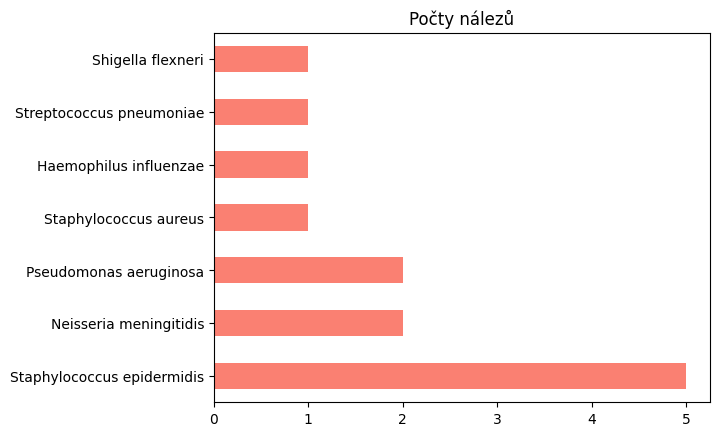

In [36]:
microbe_counts = ndf.microbe.value_counts()
microbe_counts.plot(kind='barh', color="salmon")

plt.title("Počty nálezů")
plt.show()

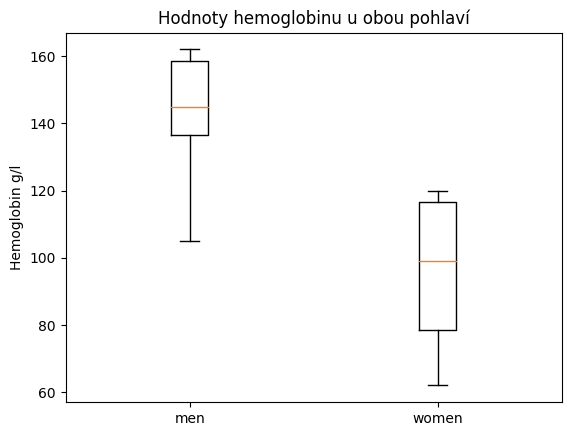

In [43]:
men = ndf.query("sex == 'm'")
women = ndf.query("sex == 'f'")

fig, ax = plt.subplots()

ax.boxplot(x=[men.hb, women.hb])
plt.xticks([1, 2], ["muži", "žena"])
plt.title("Hodnoty hemoglobinu u obou pohlaví")
plt.ylabel("Hemoglobin g/l")
plt.show()